In [20]:
import pandas as pd
import numpy as np
import datetime as dt

1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [14]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [21]:
file_name = "data/data_000637.txt"
#N = input("Number of rows: ")
data = pd.read_csv(file_name)
#data=dataframe[0:int(N)]
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [5]:
bc_max = np.max(data['BX_COUNTER'])
print("Number of BX in a ORBIT: ",bc_max+1)

Number of BX in a ORBIT:  3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [6]:
data['ABS_TIME'] = (data['ORBIT_CNT'])/(bc_max+1)*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*27.5
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,2.720092e+07
1,1,0,124,3869200167,2374,27,2.720095e+07
2,1,0,63,3869200167,2553,28,2.720545e+07
3,1,0,64,3869200167,2558,19,2.720533e+07
4,1,0,64,3869200167,2760,25,2.721054e+07
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,2.716037e+07
1310716,1,1,4,3869211171,763,11,2.716031e+07
1310717,1,0,64,3869211171,764,0,2.716003e+07
1310718,1,0,139,3869211171,769,0,2.716016e+07


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [7]:
data['ABS_TIME_HOURS'] = data['ABS_TIME'].transform(lambda x: dt.timedelta(microseconds=(x*(10**3))))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME,ABS_TIME_HOURS
0,1,0,123,3869200167,2374,26,2.720092e+07,0 days 07:33:20.919146
1,1,0,124,3869200167,2374,27,2.720095e+07,0 days 07:33:20.946646
2,1,0,63,3869200167,2553,28,2.720545e+07,0 days 07:33:25.449146
3,1,0,64,3869200167,2558,19,2.720533e+07,0 days 07:33:25.326646
4,1,0,64,3869200167,2760,25,2.721054e+07,0 days 07:33:30.541646
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,2.716037e+07,0 days 07:32:40.366334
1310716,1,1,4,3869211171,763,11,2.716031e+07,0 days 07:32:40.308834
1310717,1,0,64,3869211171,764,0,2.716003e+07,0 days 07:32:40.031334
1310718,1,0,139,3869211171,769,0,2.716016e+07,0 days 07:32:40.156334


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [8]:
data.groupby('TDC_CHANNEL').sum().sort_values(by="ORBIT_CNT", ascending=False)[0:3]

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
TDC_CHANNEL,,,,,,
139,108059,32442,418102549486957,192477704,0,2.937630e+12
64,66020,1439,255444994368975,117767051,962195,1.794813e+12
63,64642,918,250113227630194,115482430,938192,1.757355e+12


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [12]:
print('Count the number of non-empty orbits: ', len(data[data.TDC_MEAS!=0]))
print('Count the number of empty orbits: ', len(data[data.TDC_MEAS==0]))

Count the number of non-empty orbits:  1163190
Count the number of empty orbits:  147530


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [13]:
print('Orbits with at least one measurement from TDC_CHANNEL=139: ', len(data[data.TDC_CHANNEL==139]))

Orbits with at least one measurement from TDC_CHANNEL=139:  108059


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [18]:
#8. Fast Version
SR0 = pd.Series(data[data.FPGA==0]['ORBIT_CNT'].values,index=data[data.FPGA==0]['TDC_CHANNEL'].values)
print('FPGA = 0: \n' , SR0)
SR1 = pd.Series(data[data.FPGA==1]['ORBIT_CNT'].values,index=data[data.FPGA==1]['TDC_CHANNEL'].values)
print('FPGA = 1: \n', SR1)


FPGA = 0: 
 123    3869200167
124    3869200167
63     3869200167
64     3869200167
64     3869200167
          ...    
60     3869211171
62     3869211171
64     3869211171
139    3869211171
61     3869211171
Length: 922852, dtype: int64
FPGA = 1: 
 7      3869200167
6      3869200167
139    3869200167
8      3869200167
5      3869200167
          ...    
38     3869211171
36     3869211171
39     3869211171
35     3869211171
4      3869211171
Length: 387868, dtype: int64


In [ ]:
#8. Slow Version
sr0i = []
sr0v = []
sr1i = []
sr1v = []
for i in range(len(data)):
      if data['FPGA'][i] == 0:
            sr0i.append(data['TDC_CHANNEL'][i])
            sr0v.append(data['ORBIT_CNT'][i])
      else:
            sr1i.append(data['TDC_CHANNEL'][i])
            sr1v.append(data['ORBIT_CNT'][i])
SR0 = pd.Series(sr0v, index=sr0i)
SR1 = pd.Series(sr1v, index=sr1i)
print('Series for FPGA=0: \n',SR0)
print('Series for FPGA=1: \n',SR1)

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 1.0, 'FPGA = 0')

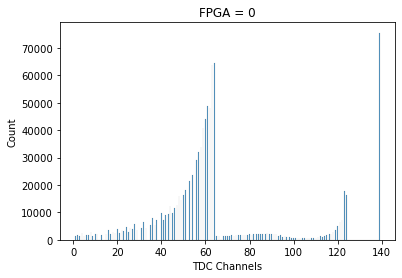

In [40]:
#9.Part 1 (Fpga=0)
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x=data[data.FPGA==0]['TDC_CHANNEL'].values)
plt.xlabel('TDC Channels')
plt.title('FPGA = 0')


Text(0.5, 1.0, 'FPGA = 1')

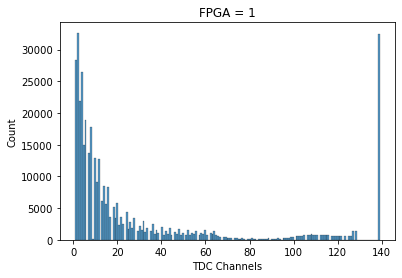

In [39]:
#9.Part 2 (Fpga=1)
sns.histplot(x=data[data.FPGA==1]['TDC_CHANNEL'].values)
plt.xlabel('TDC Channels')
plt.title('FPGA = 1')